# **Converter format ".xlsx" en ".csv" et enregistrer dans repertoire "Output"**

In [24]:
import pandas as pd

# Define the paths to the input files
comments_path = "Data/Comments.xlsx"

# Read the Excel files
comments_df = pd.read_excel(comments_path)

In [25]:
# Afficher DataFrame
comments_df

,ID Post,User Name,Comments,Sentiments
0,1,Samir Bekhouche,NaN,Neutre
1,1,Yanise Yanise,سلام عليكم ورحمة لديا مشكلة ! فليكسيت 100 دج و...,Negatif
2,1,Jj Kie,كل عام و انتم بخير,Positif
3,1,Sakou Younes,كل عام وأنتم بخير,Positif
4,1,راني نعاني,كل عام وحنا بخير,Positif
...,...,...,...,...
4100,183,Ĺã Rõsë Ýb,❤️❤️,Positif
4101,183,نسمات هادئة,💕💕💕💕,Positif
4102,183,ملك ملهاش غيرك,❤❤❤❤❤❤🌹,Positif
4103,183,سعيدي رضا,NaN,Neutre


# **Pretraitement**

## **Bibiliothèques**

In [26]:
import re
import emoji

# **Suppression des lignes où "User Name" est "Djezzy", "Mobilis" ou "Ooredoo"**

In [27]:
# Suppression des lignes où "User Name" est "Djezzy", "Mobilis" ou "Ooredoo"
comments_df = comments_df[~comments_df["User Name"].isin(["Djezzy", "Mobilis", "Ooredoo Algérie"])]

## **Suppression des valeurs NaN "Comments"**

In [28]:
comments_df = comments_df.dropna(subset=["Comments"])
comments_df = comments_df[comments_df["Comments"].str.strip() != ""]

# **Supprimer les doublons consécutifs dans "Comments"**

In [29]:
comments_df = comments_df.loc[comments_df["Comments"].shift() != comments_df["Comments"]]

In [30]:
def normalize_arabic(text):
    text = text.lower()
    text = re.sub("گ", "ك", text)
    text = re.sub("ڭ", "ك", text)
    text = re.sub("ڤ", "ق", text)
    text = re.sub("ڨ", "ق", text)
    text = re.sub("پ", "ب", text)
    text = re.sub("é", "e", text)
    text = re.sub("ê", "e", text)
    text = re.sub("ë", "e", text)
    text = re.sub("ç", "c", text)
    text = re.sub("à", "a", text)
    text = re.sub("â", "a", text)
    text = re.sub("ä", "a", text)
    text = re.sub("î", "i", text)
    text = re.sub("ï", "a", text)
    text = re.sub("æ", "ae", text)
    text = re.sub("œ", "oe", text)
    return text

def replace_emojis(text):
    emojis = {
        "\U0001F60D": "حب",
        "\U0001F611": "حب",
        "\U0001F618": "حب",
        "\U0001F619": "حب",
        "\U0001F61A": "حب",
        "\U0001F61B": "حب",
        "\U0001F61C": "حب",
        "\U0001F61D": "حب",
        "\U0001F61E": "حب", 
        "\U0001F61F": "حب",
        "\U0001F620": "غضب",
        "\U0001F621": "غضب",
        "\U0001F627": "غضب",
        "\U0001F92C": "غضب",
        "\U0001F630": "غضب",
        "\U0001FA79": "حب",
        "\U0001F970": "حب",
        "\U00002764": "حب",
        "\U0001F495": "حب",
        "\U0001F339": "حب",
    }
    for emoji, arabic_equivalent in emojis.items():
        # Ajouter un espace après chaque remplacement
        text = re.sub(emoji, " " + arabic_equivalent + " ", text)
    return text.strip()

# Appliquer la normalisation
comments_df["Comments"] = comments_df["Comments"].apply(normalize_arabic)

comments_df["Comments"] = comments_df["Comments"].apply(replace_emojis)

In [31]:
comments_df["Comments"]

1       سلام عليكم ورحمة لديا مشكلة ! فليكسيت 100 دج و...
2                                      كل عام و انتم بخير
3                                       كل عام وأنتم بخير
4                                        كل عام وحنا بخير
6                                                      حب
                              ...                        
4099                                               🩷🩷🩷🩷🩷🩷
4100                                            حب ️ حب ️
4101                                       حب  حب  حب  حب
4102                           حب  حب  حب  حب  حب  حب  حب
4104                                  حب ️ حب ️ حب ️ حب ️
Name: Comments, Length: 3801, dtype: object

## **Correction des abréviations & Regroupement phonétique**

In [32]:
abbreviations = {
    "mrc": "merci",
    "num": "numéro",
    "numro": "numéro",
    "nn": "non",
    "bn": "bonne",
    "topp": "top",
    "شوي": "قليل",
    "شويا": "قليل",
    "لزونيتي": "الوحدات",
    "حنا": "نحن",
    "أسإلتي": "اسئلة",
    "حاص": "خاص",
    "مدام": "بينما",
    "رانا": "نحن",
    "بون": "حسن",
    "توس": "جميع",
    "سبيسيال": "منفرد",
    "سبيال": "منفرد",
    "باه": "لكي",
    "زاف": "كثيرا",
    "بزاف": "كثيرا",
    "نتمني": "نتمنى",
    "فظلكم": "فضلكم",
    "ضلم": "ظلم",
    "ردى": "رد",
    "علاش": "لماذا",
    "علاه": "لماذا",
    "علا": "لماذا",
    "هذ": "هذا",
    "تبرعو": "تبرع",
    "ابليكاسيو": "تطبيق",
    "أبليكاسيون": "تطبيق",
    "أبليكاسيو": "تطبيق",
    "الخاص بكم": "نتاعكم",
    "ديرولنا": "افعلو لنا",
    "ديرو": "افعلو",
    "نحا": "نزع",
    "دير": "افعل",
    "حاجة": "شيء",
    "نتع": "خاص ب",
    "تاع": "خاص ب",
    "تع": "خاص ب",
    "جاوبوني": "رد علي",
    "مشتاركه": "مشاركة",
    "رحو": "اذهبو",
    "هدي": "هدية",
    "هذي": "هذه",
    "يروح": "يذهب",
    "يجي": "يأتي",
    "وقتاه": "متى",
    "وقتاش": "متى",
    "وقتش": "متى",
    "تردولنا": "تردون",
    "نتاع": "خاص ب",
    "شك": "من",
    "شكون": "من",
    "نحيتوها": "نزع",
    "نحيتو": "نزع",
    "نحيت": "نزع",
    "سلفلي": "قرض",
    "سلفولي": "قرض",
    "غدوة": "غدا",
    "تلقى": "تجد",
    "نلقى": "اجد",
    "نأكتيفيها": "تفعيل",
    "نأكتيفي": "تفعيل",
    "ناكتيفي": "تفعيل",
    "نعانيو": "نعانون",
    "نعانو": "نعانون",
    "ميت حال": "رديء",
    "مفهمتش": "لم افهم",
    "انو": "انه",
    "علابالي": "اعلم",
    "ليتو": "اصبحتم",
    "وليتو": "اصبحتم",
    "تدو": "تاخذون",
    "الى": "إلى",
    "خاستني": "احتاج",
    "خستني": "احتاج",
    "مشى": "تعمل",
    "مشا": "تعمل",
    "شكا": "شكوى",
    "شكيت": "شكوى",
    "زرو": "سيء",
    "زيرو": "سيء",
    "سرفيك": "خدمة",
    "سرفيس": "خدمة",
    "جيزي اب": "djezzy app",
    "nchlh": "incha allah",
    "riglou": "regler",
    "bah": "pour",
    "nwaliw": "devenir",
    "k": "comme",
    "مراحش": "لن",
    "مهمش": "ليسو",
    "تعليع": "تعليق",
    "زااف": "كثيرا",
    "khayan": "سرق",
    "djezzyy": "djezzy",
    "ومرديتش": "لم ترد",
    "واش": "ماذا",
    "منبعد": "بعد ذلك",
    "تفتحش": "لا تفتح",
    "ندير": "افعل",
    "راه": "اصبح",
    "لازم": "يجب",
    "pix": "pixx",
    "Twanty": "Twenty",
    "orod": "prod",
    "imtiyaaz": "imtiyaz",
    "tm": "ok",
    "نم": "تم",
    "جداو": "جدا",
    "زلب": "زبل",
    "كونطرا": "عقد",
    "شري": "شراء",
    "توب": "رائع",
    "جزل": "جزيلا",
    "ياسر": "كثيرا",
    "golde": "gold",
    "mknch": "introuvable",
    "rani": "je suis",
    "شكرالكم": "شكرا لكم",
    "viv": "vive",
    "عتل": "ارسل",
    "بعت": "ارسل",
    "لاجونس": "مقر",
    "rpnd": "repond",
    "prv": "prive",
    "svp": "s il vous plais",
    "yennayer": "سنة",
    "amervuh": "سعيدة",
    "assgas": "assegas",
    "asugas": "assegas",
    "asegas": "assegas",
    "amegaz": "amegas",
    "amgaz": "amegas",
    "amegaz": "amegas",
    "amgaz": "amegas",
    "amegaz": "amegas",
    "خخ": "ضحك",
    "هه": "ضحك",
    "سبي": "سبيسيال",
    "شبكهمشكورين": "شبكه مشكورين",
    "يعطيكمصحه": "يعطيكم صحه",
    "نشله": "ان شاء الله",
    "عندوش": "لا يوجد",
    "خفظو": "تخفيض",
    "سء": "سؤال",
    "مليحة": "حسن",
    "مليحه": "حسن",
    "وله": "و الله",
    "مكمات": "مكالمات",
    "وينتا": "متى",
    "تدوها": "تاخذون",
    "felawen": "tous",
    "ya": "il y a",
    "en": "في",
    "panne": "عطل",
    "happy": "سعيدة",
    "koum": "votre",
    "ayi": "faible",
    "new": "جديدة",
    "year": "سنة",
    "years": "سنة",
    "شنو": "ما هو",
    "هدا": "هذا",
    "شالنج": "تحدي",
    "li": "qui",
    "bghi": "aime",
    "ndirlo": "faire",
    "yji": "viens",
    "lah": "pourquoi",
    "raho": "que il",
    "hbs": "arret",
    "بر": "فقط",
    "برك": "فقط",
    "غي": "الا",
    "غير": "الا",
    "الي": "الى",
    "حسنو": "اصلاح",
    "سقمو": "اصلاح",
    "جوند": "legend",
    "يجاند": "legend",
    "ليجند": "legend",
    "ارطيا": "جزء",
    "علجال": "من أجل",
    "تثقال": "بطء",
    "كون": "ليت",
    "بغى": "اراد",
    "يبغي": "يريد",
    "نبغي": "نريد",
    "تفرج": "مشاهدة",
    "ماتش": "مباراة",
    "رجا": "رجاء",
    "متمشلكش": "لا تعمل",
    "متمسيلكش": "لا تعمل",
    "لايص": "اماكن",
    "بلايص": "اماكن",
    "بلاصة": "اماكن",
    "نسقسي": "اسأل",
    "اذ": "اذا",
    "يمتي": "بلا حدود",
    "اليميتي": "بلا حدود",
    "خسني": "اريد",
    "باطل": "مجانا",
    "قولد": "gold",
    "تعيف": "بطء",
    "نسييو": "محاولة",
    "نلعبو": "لعب",
    "نكونو": "أكون",
    "عب": "لعب",
    "كف": "كيف",
    "اللهيوفقناجميعاقولويارب": "الله يوفقنا جميع اقولو يارب",
    "congratulations": "مبروك",
    "berkaw": "arret",
    "ser": "vole",
    "تردوش": "لا تردون",
    "هضرت": "تكلمت",
    "باش": "لكي",
    "تحلى": "حل",
    "تحلي": "حل",
    "لينا": "لنا",
    "حض": "حظ",
    "wech": "Quoi",
    "ndirou": "faire",
    "bach": "pour",
    "nrebhou": "gagner",
    "elfe": "mille",
    "mabrok": "felicitations",
    "koules": "tous",
    "moucharikones": "participants",
    "el": "les",
    "mabrouk": "مبروك",
    "اطوههالي": "اعطوها لي",
    "شاب": "جميل",
    "يعطيكمالصحة": "يعطيكم الصحة",
    "illa": "lent",
    "woww": "wow",
    "يارب": "يا رب",
    "كلشي": "كل شيء",
    "كنكتي": "تواصل",
    "مانكونيكتيش": "لا أتواصل",
    "يووز": "yooz",
    "يوز": "yooz",
    "وش": "ما هو",
    "وشمن": "اي",
    "ديما": "dima",
    "راه": "انه",
    "معجبتنيش": "سيء",
    "تحبسلي": "توقف",
    "انتاع": "ل",
    "لوس": "plus",
    "شكراوريدو": "شكرا أوريدو",
    "در": "فعل",
    "رهي": "انه",
    "كاين": "يوجد",
    "مباغش": "لا يريد",
    "يمدلي": "يعطيني",
    "يخرجو": "خروج",
    "اكتر": "أكثر",
    "مايمشيش": "لا يعمل",
    "سوايع": "ساعة",
    "محبتش": "لا",
    "جام": "مستحيل",
    "جامي": "مستحيل",
    "تمشلي": "تعمل",
    "ريفي": "خاص",
    "قاع": "كل",
    "منربحش": "لا أربح",
    "منربحوش": "لا أربح",
    "نقارع": "صبر",
    "مفتحتوهاليش": "لا تفتح",
    "ابونمون": "اشتراك",
    "مساج": "رسالة",
    "رجعو": "رد",
    "صحيتو": "شكرا",
    "لاتوجد": "لا توجد",
    "نلقاش": "لا أجد",
    "ما نلقاش": "لا أجد",
    "كريدي": "رصيد",
    "ريبونديولنا": "رد",
    "جد": "جدا",
    "ينحيولي": "نزع",
    "يحذفولي": "نزع",
    "ماسلفت": "لم اقترض",
    "مدايرا": "لم أفعل",
    "راهي": "إنها",
    "فور": "ممتاز",
    "هايل": "ممتاز",
    "مليح": "جيد",
    "شابة": "جميل",
    "ماصلحتليش": "لا تعمل",
    "إستلاف": "قرض",
    "خص": "اريد",
    "هاذ": "هذا",
    "شحال": "كم",
    "تاكتيفيه": "تفعيل",
    "حتان": "كي",
    "كيفاش": "كيف",
    "غلطة": "خطا",
    "ختاريت": "خيار",
    "ديالي": "خاص بي",
    "حاب": "اريد",
    "ويل": "أو",
    "ابعث": "ارسال",
    "goold": "gold",
    "ماتجاوبوش": "عدم رد",
    "مهدى": "هدية",
    "واشهرالجاي": "شهر موالي",
    "نخلصش": "لا أدفع",
    "ابليس": "plus",
    "تأكتيفها": "تفعيل",
    "هيل": "hayla",
    "هاذي": "هذه",
    "وشمن": "ما هي",
    "جزاير": "جزائر",
    "معن": "معنى",
    "فاه": "فيها",
    "فاش": "اي",
    "مكوبي": "مقطوع",
    "مي": "لكن",
    "مايمشيلك": "لا يعمل",
    "نديرلهم": "اعمل لهم",
    "تتمسخرو": "استهزاء",
    "ريبونديو": "رد",
    "plais" : "من فظلكم",
    "كفاه": "كيف",
    "ندموندي": "طلب",
    "دخلتو": "ادخال",
    "العالميه": "عالمية",
    "قات": "بقي",
    "بقات": "بقي",
    "nechlh": "incha allah",
    "jdida": "جديد",
    "كيفما": "كيف",
    "اندير": "افعل",
    "ذيم": "دائما",
    "وين": "أين",
    "راهي": "هي",
    "ماندمت": "ندم",
    "حشو": "خدعة",
    "حشوة": "خدعة",
    "انشاءاللهتكونمننصيبي": "ان شاء الله تكون من نصيبي",
    "نتمنالهم": "اتمنى",
    "راحوش": "لم يذهب",
    "بادن": "باذن",
    "الي": "الذي",
    "تغلقلو": "غلق",
    "نيمروه": "رقم",
    "يسترجعو": "استرجاع",
    "رانيني": "ranini",
    "عقوبة": "عاقبة",
    "قوب": "عاقبة",
    "حطو": "وضع",
    "لينا": "لنا",
    "ستمرار": "مستمر",
    "لابيلكاسيو": "تطبيق",
    "لبليكاسيو": "تطبيق",
    "متمشيش": "لا تعمل",
    "حبستوها": "توقف",
    "حمال": "تحميل",
    "مزان": "ميزان",
    "جيه": "جهة",
    "فلاترددو": "فلا تترددو",
    "خدمهوعروضاطاقم": "خدمة و عروض طاقم",
    "فلعاصمة": "في عاصمة",
    "nztjwice": " ",
    "refvf": " ",
    "b": " ",
    "br": " ",
    "ابار": "يبارك",
    "يحفضكم": "يحفظكم",
    "يلوس": "plus",
    "تاه": "متى",
    "بف": " ",
    "sagmou": "regler",
    "شويش": "switch",
    "بغية": "اريد",
    "dialkom": "vous",
    "sahel": "facile",
    "toop": "top",
    "هنيء": "مبروك",
    "puse": "sim",
    "pui": "puis",
    "nerbah": "gagne",
    "ghir": "sauf",
    "بيان": "جيدا",
    "ماتمشيش": "لا تعمل",
    "نحافضو": "حفاظ",
    "تخلاص": "انتهاء",
    "متعرفش": "لا تعلم",
    "خاصتا": "خاصة",
    "وفى": "و في",
    "ظل": "دائما",
    "مدرتو": "لم تفعلو",
    "لموبليس": "موبيليس",
    "را": "انه",
    "صر": "حدث",
    "rah": "il est",
    "gae": "tous",
    "dok": "maintenant",
    "لابليكاسيون": "تطبيق",
    "كلش": "كل",
    "مشاءالله": "ما شاء الله",
    "حبس": "توقف",
    "زيد": "ايضا",
    "تسرقو": "سرق",
    "تاكتيفي": "تفعيل",
    "زوعاماء": "زعماء",
    "ul": " ",
    "كدب": "كذب",
    "ميقراسيون": "تبديل",
    "شح": "كم",
    "فيهاش": "لا يوجد",
    "نجاوب": "اجيب",
    "راحت": "ذهب",
    "متسواش": "سيء",
    "تعكم": "خاص بكم",
    "حقاهايلة": "ممتاز",
    "صرقولي": "سرق",
    "صرق": "سرق",
    "ويني": "اين",
    "حمدلله": "حمد لله",
    "رحمن": "رحمان",
    "نشال": "شاء الله",
    "ماشاء": "ما شاء",
    "تنحولي": "نزع",
    "خمسلاف": "خمسة ألف",
    "خمسلاف": "خمسة ألف",
    "مفعلتهاش": "لا تفعيل",
    "سرقتولي": "سرق",
    "لكريدي": "رصيد",
    "انترنتوراها": "اين انترنت",
    "تعييف": "سيء",
    "تعيف": "سيء",
    "ضك": "الان",
    "جزى": "جزاك",
    "نشاء": "ان شاء",
    "إنشاءالله": "ان شاء الله",
    "نشالله": "ان شاء الله",
    "شاءالله": "شاء الله"
}

def replace_abbreviations(text):
    words = text.split()
    return ' '.join([abbreviations[word] if word in abbreviations else word for word in words])

comments_df['Comments'] = comments_df['Comments'].apply(replace_abbreviations)

In [33]:
import re

# Dictionnaire de regroupement phonétique
phonetic_groups = {
    "تعبئة": ["كنفليكسيو", "نفليكسي", "نفليكسيو", "فليكس", "تفليكسي", "فليكسولنا", "نفلبكسى", "فليكسيت", "كسي", "فليكسي"],
    "connexion": ["conx", "cnx", "ncx", "conexion", "connection"],
    "reseau": ["wrizo", "rizo", "riso", "rysou", "resou", "risou"],
    "اصلاح": ["ريقلوه", "ريقلو", "صلحو", "ريقولو", "صلحونا", "عدلو", "ريغلونا", "رقليو", "تريغليونا", "لوتصلحولينا", "تريقلونا", "وريقليو"],
    "شبكة": ["ريزو", "اريزو", "الريزو", "ااريزو", "خط", "خطي", "رزو"],
    "ما به": ["واشي", "واش به", "وشبيه", "شبيه"],
    "لا يوجد": ["ماكاش", "مكانش", "مكاش", "مكااش", "والو", "معنديش", "الو"], 
    "أي": ["كش", "كاش"],
    "انترنت": ["كونيكسيون", "كونكسيو", "كونكزيون", "كونيكسيو", "ليدوني", "انترنات", "انترنيت","نترنت", "أنترنات", "الكنكسيو", "الانثرنات", "الانترنت", "أنترنت",  "اترنات", "الكونيكسيوو", "نت", "لكونيكسيو", "كنكسيو", "كونيكسو", "انترن"],
    "جازي": ["جايز", "جاز", "دجيزي", "دجزي", "جيزي", "جايزي"],
    "اسقاس": ["اسوكاس", "اصكاس", "اسيقاس", "اسكاس"],
    "امقاز": ["أموقاز", "امكاز"],
    "رمز": ["كود", "رزم"],
    "بارك": ["بارى", "بيار", "باراك", "يبارك"],
    "شريحة": ["لابيس", "لبيس", "بيس", "لابوس", "لبييس", "ليبيس", "بوس", "سبيسي", "لبووس", "pis"],
    "اوريدو": ["اريدوو", "لأوريد", "ياؤريدوا", "اوريدوا", "واوريدو", "ااوريدو", "اريدو"],
    "ان شاء": ["إنشاء", "نشالله", "انشاء"],
    "ilimite": ["ilm", "ilmt", "ilimiti", "ilim"],
}

# Création d’un mapping inverse (pour accélérer la recherche)
phonetic_mapping = {}
for standard, variations in phonetic_groups.items():
    for variant in variations:
        phonetic_mapping[variant] = standard

# Fonction de remplacement des variantes phonétiques
def replace_phonetic_variants(text):
    words = text.split()
    return ' '.join([phonetic_mapping[word] if word in phonetic_mapping else word for word in words])

comments_df['Comments'] = comments_df['Comments'].apply(replace_phonetic_variants)

def normalize_arabic(text):
    text = text.lower()
    text = re.sub("[إأآا]", "ا", text)
    return text

# Appliquer la normalisation
comments_df["Comments"] = comments_df["Comments"].apply(normalize_arabic)

In [34]:
comments_df["Comments"]

1       سلام عليكم ورحمة لديا مشكلة ! تعبئة 100 دج و ب...
2                                      كل عام و انتم بخير
3                                       كل عام وانتم بخير
4                                        كل عام وحنا بخير
6                                                      حب
                              ...                        
4099                                               🩷🩷🩷🩷🩷🩷
4100                                            حب ️ حب ️
4101                                          حب حب حب حب
4102                                 حب حب حب حب حب حب حب
4104                                  حب ️ حب ️ حب ️ حب ️
Name: Comments, Length: 3801, dtype: object

# **Nettoyage des données**

In [35]:
def clean_text(text):
    text = emoji.replace_emoji(text, replace=" ")  # Supprimer les emojis
    text = re.sub(r'http\S+|https\S+', " ", str(text))  # Supprimer les hyperliens
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', " ", str(text))  # Supprimer les URL
    text = re.sub(r'@\S+', '', str(text))  # Supprimer les mentions @
    text = text.replace("_", " ").replace("#", "")  # Supprimer # et _
    text = text.replace("'", " ")  # Supprimer '
    text = re.sub(r'\.|,|،|؛', " ", text)  # Supprimer certaines ponctuations
    
    # Supprimer les mots réservés
    text = re.sub(r'\bRT\b|\bRetweeted\b', " ", text)
    reserved_words = r'\b(?:h{1,2}|m{1,2}|s{1,2}|Da|da|DA|Euro|جيغات|يورو|أورو|g|جيكا|جيقا|جيقي|km|kilometre|m|qr|mb|gb|حي|giga|milles|esim|Mo|mo|ko|mega|Go|جيغا|جيجا|ساعة|دج|دينار(?: جزائري)?|Dollars?|دولار|Algérie)\b'
    text = re.sub(reserved_words, " ", text, flags=re.IGNORECASE)

    # Supprimer tout caractère spécial sauf l'alphabet arabe et latin
    text = re.sub(r'[^a-zA-Z0-9\u0600-\u06FF\s]', " ", text)
        
    # Supprimer les voyelles courtes arabes (حركات)
    harakat = r"[\u064B-\u0652]"
    text = re.sub(harakat, '', text)

    text = re.sub(r"(.)\1{2,}", r"\1", text)  # Supprimer les caractères consécutifs en double
    text = re.sub(r'\d+', " ", text)  # Supprimer les chiffres
    text = text.replace('\n', " ").replace('/', " ")  # Supprimer sauts de ligne et /
    text = re.sub(r'[^\w\s]', " ", text)  # Supprimer les caractères spéciaux

    return text.strip()

# Appliquer le nettoyage aux commentaires et posts
comments_df["Comments"] = comments_df["Comments"].apply(clean_text)

# Remplacer les valeurs nulles par une chaîne vide
comments_df["Comments"] = comments_df["Comments"].fillna('')

# Supprimer les lignes vides après nettoyage
comments_df = comments_df.dropna(subset=["Comments"])
comments_df = comments_df[comments_df["Comments"].str.strip() != ""]

In [36]:
comments_df["Comments"]

1       سلام عليكم ورحمة لديا مشكلة تعبئة   و بدات تنق...
2                                      كل عام و انتم بخير
3                                       كل عام وانتم بخير
4                                        كل عام وحنا بخير
6                                                      حب
                              ...                        
4098    سلام عليكم اوريدو عندي مشكل كل مرة تعبئة نزع خ...
4100                                               حب  حب
4101                                          حب حب حب حب
4102                                 حب حب حب حب حب حب حب
4104                                       حب  حب  حب  حب
Name: Comments, Length: 3625, dtype: object

# **Stop word**

Les Stop words ou bien les mots vides sont les mots couramment utilisés qui sont généralement ignorés par le moteur de recherche, tels que the, اللذين, إن, etc. Ces mots sont supprimés pour économiser de l’espace dans la base de données et le temps de traitement, c’est pour cette raison qu’on va essayer dans l’étape suivante d’utiliser le package ntlk pour supprimer ces mots vides.

Le package stop-words est utilisé pour supprimer les mots vides du texte en Python. Ce paquet contient des mots vides dans de nombreuses langues comme l’anglais, l’Arabe, le français, l’espagnol et plus encore.

In [37]:
# import necessary libraries
import nltk
from nltk.corpus import stopwords

# Charger les stopwords pour l'arabe et le français
nltk.download('stopwords')
arabic_stopwords = set(stopwords.words('arabic'))
french_stopwords = set(stopwords.words('french'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kikoo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
# Affiche quelques mots (stop-words)
print(stopwords.words('arabic'))

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

In [39]:
# Liste des mots à exclure
words_to_remove = [
    'لا', 'كثيرا', 'كثير', 'دون', 'ليس', 'ليست', 'فلا', 'غير', 'لسنا', 'لكن', 'لاسيما', 
    'لست', 'لستم', 'لم', 'ما', 'لن', 'ليست', 'ليسوا', 'بئس', 'نعم', 'ساء', 'عجبا', 'عيانا', 
    'غالبا', 'فضلا', 'حسبنا', 'حسب', 'أجل', 'أما', 'إما', 'بس', 'بلى', 
    'بينما', 'حاشا', 'حبذا', 'دون', 'عدا', 'عسى', 'غير', 'فلا', 'كلا', 
    'لا', 'لاسيما', 'لدى', 'لست', 'لستم', 'لستما', 'لستن', 'لسن', 'لسنا', 
    'لعل', 'لكن', 'لكنما', 'لكي', 'لكيلا', 'لم', 'لن', 'لو', 'لولا', 'لوما', 'لئن', 
    'ليس', 'ليسا', 'ليست', 'ليستا', 'ليسوا', 
    'هيت', 'هيهات', 'وإذ', 'ولا', 'ولكن', 'ولو'
]

# Filtrer les stop words pour exclure les mots dans `words_to_remove`
final_arabic_stopwords = [word for word in arabic_stopwords if word not in words_to_remove]

# Afficher la liste finale
print(final_arabic_stopwords)

['اللائي', 'لكما', 'طرا', 'ثاني', 'ثمنمئة', 'هم', 'سوف', 'أيلول', 'جمعة', 'دواليك', 'ريال', 'ين', 'أنت', 'تلكم', 'حادي', 'واو', 'أ', 'فاء', 'اتخذ', 'صهْ', 'حاي', 'متى', 'د', 'بنا', 'أيا', 'سمعا', 'آهاً', 'يناير', 'كأي', 'ثلاثمائة', 'ثلاث', 'إزاء', 'تي', 'أخٌ', 'الآن', 'تخذ', 'اللتيا', 'خلا', 'ماذا', 'هَاتِي', 'ألفى', 'أوه', 'الذي', 'تِي', 'تَيْنِ', 'وهب', 'أوشك', 'دولار', 'أل', 'اللذان', 'أربع', 'آها', 'طاق', 'ستمئة', 'لهما', 'ما أفعله', 'اللواتي', 'حزيران', 'أن', 'منذ', 'إليكَ', 'ذانك', 'ض', 'راء', 'ه', 'هَاتانِ', 'إن', 'ذهب', 'هَؤلاء', 'إياي', 'آهٍ', 'تانِك', 'نحن', 'همزة', 'كأنّ', 'انقلب', 'عليك', 'ذانِ', 'هلا', 'أيها', 'ذي', 'نفس', 'كليكما', 'أحد', 'ثامن', 'وراءَك', 'نبَّا', 'يونيو', 'أيّ', 'إذاً', 'رأى', 'ذه', 'أنتم', 'ثمان', 'م', 'ئ', 'س', 'ثلاثون', 'شبه', 'أمسى', 'ذلكم', 'صباح', 'هاهنا', 'ياء', 'عشرة', 'أولالك', 'إنما', 'ذلكن', 'اربعون', 'علًّ', 'أنتما', 'كن', 'كان', 'بات', 'يفعلون', 'بكم', 'شتان', 'نحو', 'إمّا', 'ظنَّ', 'أيضا', 'هنا', 'ذاك', 'لهم', 'بخ', 'وا', 'أمام', 'هلم', 'أ

In [40]:
# Affiche quelques mots (stop-words)
print(stopwords.words('french'))

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [41]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in final_arabic_stopwords and word not in french_stopwords]
    return " ".join(filtered_words)

# Appliquer la suppression des stop-words
comments_df["Comments"] = comments_df["Comments"].apply(remove_stopwords)

comments_df["Comments"] = comments_df["Comments"].apply(clean_text)

In [42]:
comments_df["Comments"]

1       سلام عليكم ورحمة لديا مشكلة تعبئة بدات تنقص قل...
2                                           عام انتم بخير
3                                          عام وانتم بخير
4                                           عام وحنا بخير
6                                                      حب
                              ...                        
4098    سلام عليكم اوريدو عندي مشكل مرة تعبئة نزع الف ...
4100                                                حب حب
4101                                          حب حب حب حب
4102                                 حب حب حب حب حب حب حب
4104                                          حب حب حب حب
Name: Comments, Length: 3625, dtype: object

## **Sauvegarde des fichiers nettoyés**

In [43]:
# Appliquer le nettoyage aux commentaires et posts
comments_df["Comments"] = comments_df["Comments"].apply(clean_text)

comments_df = comments_df.dropna(subset=["Comments"])
comments_df = comments_df[comments_df["Comments"].str.strip() != ""]

# Sauvegarder les fichiers après la translittération
comments_df.to_csv("Data/Data_clean/Comments_clean.csv", index=False)

print("Prétraitement terminé et fichiers enregistrés !")

Prétraitement terminé et fichiers enregistrés !


In [44]:
# Fonction pour supprimer les mots répétitifs consécutifs et les espaces multiples
def remove_consecutive_duplicates_and_extra_spaces(phrase):
    # Supprimer les répétitions consécutives
    phrase = re.sub(r'(\b\w+\b)(?=\s+\1)', '', phrase)
    # Supprimer les espaces multiples
    phrase = re.sub(r'\s+', '  ', phrase)
    # Supprimer les espaces en début et fin de chaîne
    return phrase.strip()

# Appliquer la fonction à chaque commentaire
comments_df["Comments"] = comments_df["Comments"].apply(remove_consecutive_duplicates_and_extra_spaces)

# Supprimer les stop-words arabes
comments_df["Comments"] = comments_df["Comments"].apply(lambda text: ' '.join([word for word in text.split() if word not in arabic_stopwords]))

In [45]:
comments_df["Comments"]

1       سلام عليكم ورحمة لديا مشكلة تعبئة بدات تنقص قل...
2                                           عام انتم بخير
3                                          عام وانتم بخير
4                                           عام وحنا بخير
6                                                      حب
                              ...                        
4098    سلام عليكم اوريدو عندي مشكل مرة تعبئة نزع الف لحل
4100                                                   حب
4101                                                   حب
4102                                                   حب
4104                                                   حب
Name: Comments, Length: 3616, dtype: object

✅ Les mots les plus fréquents enregistrée dans : Results\mots_frec.png


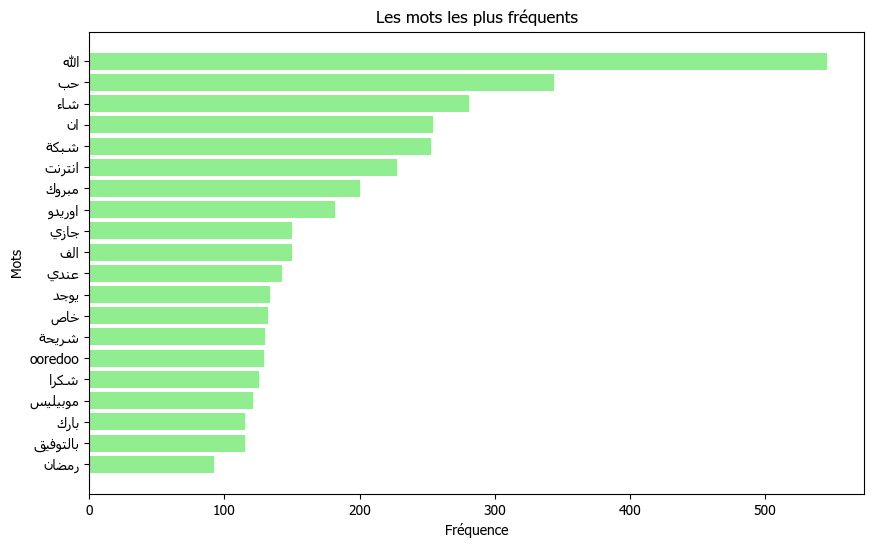

In [46]:
import os
import matplotlib.pyplot as plt
from collections import Counter
from arabic_reshaper import reshape
from bidi.algorithm import get_display

# Specify the font that supports Arabic characters
plt.rcParams['font.family'] = 'Tahoma'  # You can use 'DejaVu Sans', 'Amiri', etc.

# Compter les mots les plus fréquents
all_words = ' '.join(comments_df["Comments"]).split()
word_counts = Counter(all_words)

# Obtenir les 10 mots les plus fréquents
most_common_words = word_counts.most_common(20)

# Préparer les données pour le graphique
words = [get_display(reshape(word)) for word, count in most_common_words]
counts = [count for word, count in most_common_words]

# Dessiner le graphique
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='lightgreen')
plt.xlabel('Fréquence')
plt.ylabel('Mots')
plt.title('Les mots les plus fréquents')
plt.gca().invert_yaxis()  # Inverser l'axe Y pour afficher les mots dans l'ordre

# Sauvegarde les mots les plus fréquents
output_dir = "Results"
mots_frec_path = os.path.join(output_dir, "mots_frec.png")
plt.savefig(mots_frec_path)
print(f"✅ Les mots les plus fréquents enregistrée dans : {mots_frec_path}")

plt.show()